<a href="https://colab.research.google.com/github/maxinelanier/Seattle-Weather/blob/data/AnalysisNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### This notebook will use a file containing daily precipitation data in both St. Louis and Seattle from 5 years of observations, in order to compare, analyze, and answer the question of which city gets more rain.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [2]:
url = 'https://raw.githubusercontent.com/maxinelanier/Seattle-Weather/main/clean_seattle_stl_weather.csv'
df = pd.read_csv(url)

**Data Source**: This data set was made in the attached data preparation file: https://github.com/maxinelanier/Seattle-Weather/blob/main/Data_Preparation_.ipynb . It is a cleaned and combined version of two data sets, seattle_rain.csv and stl_rain.csv, both accessed using the NOAA Climate Data website https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND online search tool.

##### $\rightarrow$ Review the contents of the data set.

In [3]:
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.0,1,1
1,2018-01-02,STL,0.0,2,1
2,2018-01-03,STL,0.0,3,1
3,2018-01-04,STL,0.0,4,1
4,2018-01-05,STL,0.0,5,1


In [4]:
df.tail()

,date,city,precipitation,day_of_year,month
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12
3651,2022-12-31,SEA,0.17,365,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3652 non-null   object 
 1   city           3652 non-null   object 
 2   precipitation  3652 non-null   float64
 3   day_of_year    3652 non-null   int64  
 4   month          3652 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 142.8+ KB


## State your questions

In order to answer the general question comparing how much it rains in Seattle and St. Louis, we can ask:

Which city got the most total amount of rainfall over the entire data set (most rain over the five years)?

For each month, which city experienced the most average daily rainfall? 

For each city, how many days per average month are there with no precipitation?
















## Analysis

Question 1: Which city got the most total amount of rainfall over the entire data set (most rain over the five years)? 

The following chart will compare the total amount of rain in inches recieved over 5 years in Seattle and St. Louis.

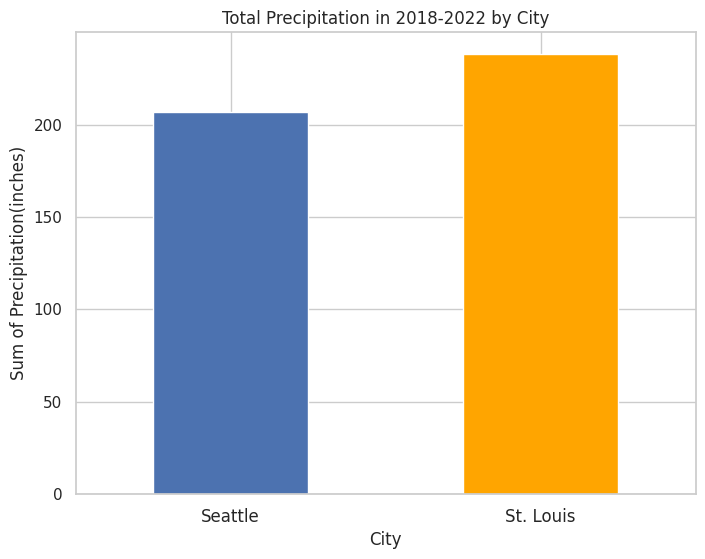

In [22]:
rain_sum = df.groupby('city')['precipitation'].sum()
total = rain_sum.plot(kind='bar', rot=0, color=['b', 'orange'], figsize=(8, 6))
total.set_xlabel('City')
total.set_ylabel('Sum of Precipitation(inches)')
total.set_title('Total Precipitation in 2018-2022 by City')
total.set_xticklabels(['Seattle', 'St. Louis'], fontsize=12)


plt.show()

The above chart shows that over the entire 5 years of data, St. Louis recieved more rain in inches than Seattle did.

**Question 2**
For each month, which city experienced the most average daily rainfall?

The following data frame groups by city and month to find the average precipitation over the 5 years for each month, in both separate cities.

In [7]:
df_avg = df.groupby(['city', 'month'])['precipitation'].mean()
print(df_avg)

city  month
SEA   1        0.230742
      2        0.176472
      3        0.089075
      4        0.100483
      5        0.069161
      6        0.063167
      7        0.013984
      8        0.019995
      9        0.055622
      10       0.118452
      11       0.201867
      12       0.224903
STL   1        0.102065
      2        0.118298
      3        0.171355
      4        0.143733
      5        0.174839
      6        0.117200
      7        0.225419
      8        0.169871
      9        0.062333
      10       0.109677
      11       0.086267
      12       0.078387
Name: precipitation, dtype: float64


This pivot makes it so that for each month, the bar representing average daily rainfall in Seattle and St. Louis can be right next to eachother to be more easily compared and visually pleasing.

In [8]:
tmp = df_avg.unstack(level=0)

In [9]:
print(tmp)

city        SEA       STL
month                    
1      0.230742  0.102065
2      0.176472  0.118298
3      0.089075  0.171355
4      0.100483  0.143733
5      0.069161  0.174839
6      0.063167  0.117200
7      0.013984  0.225419
8      0.019995  0.169871
9      0.055622  0.062333
10     0.118452  0.109677
11     0.201867  0.086267
12     0.224903  0.078387


The following code plots the average daily precipitation for each city and adjusts the legend and axis labels.

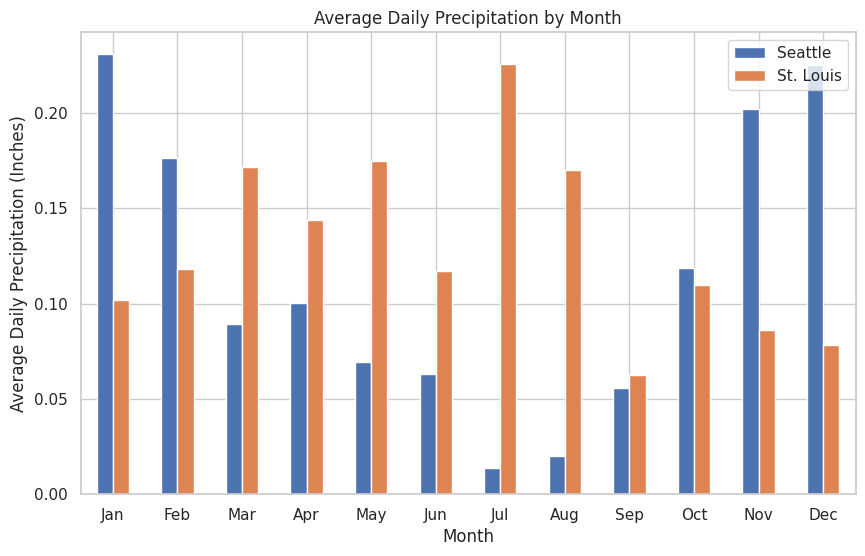

In [10]:
monthly_avg = tmp.plot(kind='bar', figsize=(10, 6))

#labels
monthly_avg.legend(['Seattle', 'St. Louis'])
monthly_avg.set_title('Average Daily Precipitation by Month')
monthly_avg.set_xlabel('Month')
monthly_avg.set_ylabel('Average Daily Precipitation (Inches)')
monthly_avg.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

This chart shows us that St. Louis gets the majority of it's rain in the summer months, while Seattle is the least rainy during that time. For 5 months, Seattle is rainier on a daily basis, and St. Louis for 7 months.

**Question 3**
For each city, how many days per average month are there with no precipitation?

Select rows of the data where there is no precipitation.

In [11]:
dry_df = df[df['precipitation'] == 0]
dry_df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.0,1,1
1,2018-01-02,STL,0.0,2,1
2,2018-01-03,STL,0.0,3,1
3,2018-01-04,STL,0.0,4,1
4,2018-01-05,STL,0.0,5,1


In [23]:
dry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 3636
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2055 non-null   object 
 1   city           2055 non-null   object 
 2   precipitation  2055 non-null   float64
 3   day_of_year    2055 non-null   int64  
 4   month          2055 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 96.3+ KB


New data frame with 2055 entries.

Group by city and month, counting the number of entries for each month, and dividing by five to get the average for 5 years. Then use unstack to get data into the right formal for plotting.

In [16]:
dry_days = (dry_df.groupby(['city', 'month'])['precipitation'].count()/5).unstack(level=0)

In [17]:
print(dry_days)

city    SEA   STL
month            
1       7.2  22.0
2       5.2  17.0
3      15.8  19.4
4      11.8  17.8
5      16.6  17.6
6      16.8  20.6
7      23.6  21.0
8      22.0  22.2
9      18.6  23.4
10     14.2  21.8
11      8.2  20.6
12      5.4  22.2


Bar chart plotted with the above data frame, relabeling axes and tick marks.

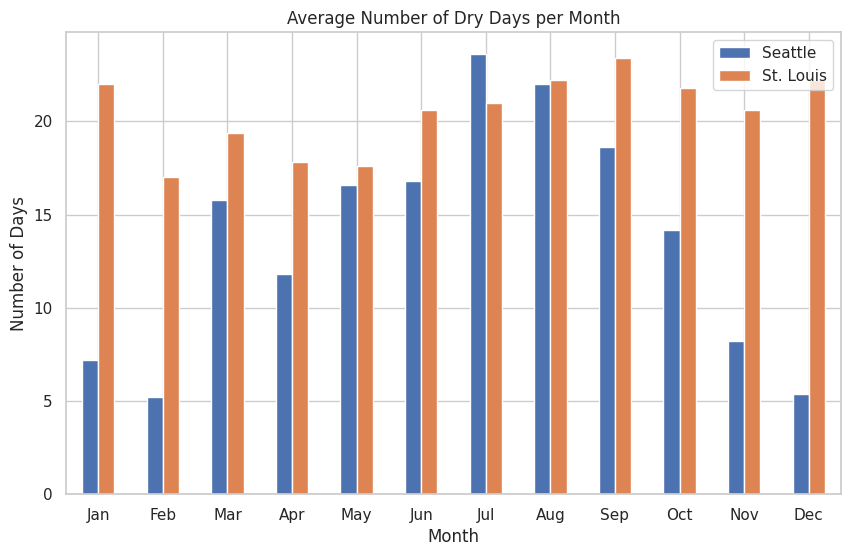

In [19]:
dry_avg = dry_days.plot(kind='bar', figsize=(10, 6))

#labels
dry_avg.legend(['Seattle', 'St. Louis'])
dry_avg.set_title('Average Number of Dry Days per Month')
dry_avg.set_xlabel('Month')
dry_avg.set_ylabel('Number of Days')
dry_avg.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

The resulting chart compares Seattle and St. Louis for each month to see which city has more average days with no precipitation. 

# Brief Conclusions

The first and second chart consider the amount of rain recieved in the two cities, while the third one investigates the time spent in the rain. The first chart shows that over 5 years, St. Louis got more inches of rain than Seattle. The second plot shows that for over half the year (7 months), on an average day it will rain more in inches in St. Louis than in Seattle. The third chart shows that for almost the entire year (11 months), it rains more days per month in Seattle than St. Louis. 

While the amount of rainfall is more in St. Louis, the frequency of rainy days in far more in Seattle.